In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("archive/train/angry/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

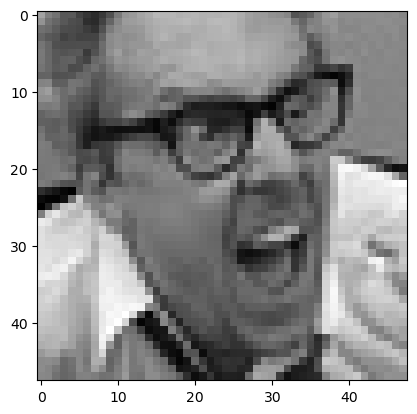

In [4]:
plt.imshow(img_array)

In [5]:
dataDirectory = "archive/train/"

In [6]:
classes = ["angry","disgust","fear", "happy", "neutral", "sad", "surprise"]

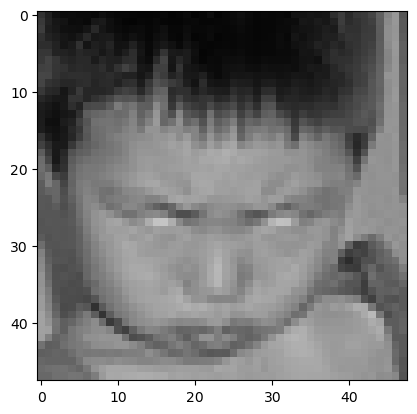

In [7]:
for category in classes:
    path = os.path.join(dataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        #backtorgc = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

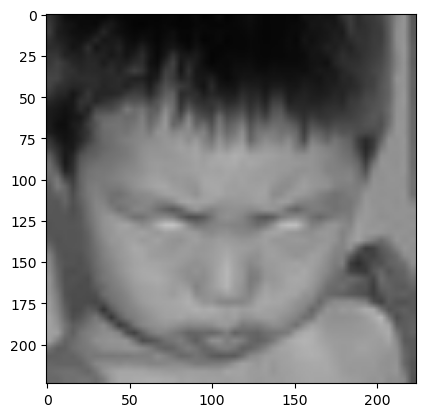

In [8]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

read all the images and convert them to array

In [10]:
training_Data = []

def create_training_Data():
    for category in classes:
        path = os.path.join(dataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

28709


In [13]:
import random
random.shuffle(training_Data)

In [14]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

#converting it to 4 Dimension
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [15]:
X.shape

(28709, 224, 224, 3)

In [16]:
X = X/255.0; #Normalizing

In [17]:
y[1000]

2

In [18]:
Y = np.array(y)

In [21]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [19]:
Y.shape

(28709,)

Deep learning model for training - Transfer Learning

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = tf.keras.applications.MobileNetV2() #Pre-trained Model

In [22]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

Transfer Learning - Tuning, weights

In [23]:
base_input = model.layers[0].input

In [24]:
base_output = model.layers[-2].output

In [25]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [26]:
final_output = layers.Dense(128)(base_output) #adding new layer, after the output of flatten layer
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [27]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [28]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [29]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [30]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [31]:
print(type(X))

<class 'numpy.ndarray'>


In [32]:
for i in range(21):
    new_model.fit(X[i*1367: (i+1)*1367], Y[i*1367: (i+1)*1367], epochs = 10, batch_size=64)

Epoch 1/10
43/43 [==============================] - 75s 1s/step - loss: 1.5959 - accuracy: 0.3892
Epoch 2/10
43/43 [==============================] - 66s 2s/step - loss: 1.2355 - accuracy: 0.5618
Epoch 3/10
43/43 [==============================] - 61s 1s/step - loss: 1.0040 - accuracy: 0.6342
Epoch 4/10
43/43 [==============================] - 60s 1s/step - loss: 0.8962 - accuracy: 0.6767
Epoch 5/10
43/43 [==============================] - 60s 1s/step - loss: 0.7427 - accuracy: 0.7498
Epoch 6/10
43/43 [==============================] - 61s 1s/step - loss: 0.6840 - accuracy: 0.7718
Epoch 7/10
43/43 [==============================] - 61s 1s/step - loss: 0.5119 - accuracy: 0.8244
Epoch 8/10
43/43 [==============================] - 60s 1s/step - loss: 0.4654 - accuracy: 0.8449
Epoch 9/10
43/43 [==============================] - 60s 1s/step - loss: 0.3395 - accuracy: 0.8910
Epoch 10/10
43/43 [==============================] - 60s 1s/step - loss: 0.3315 - accuracy: 0.8910
Epoch 1/10
43/43 [=

ResourceExhaustedError: Graph execution error:

Detected at node 'model/block_16_depthwise_BN/FusedBatchNormV3' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
      self.io_loop.start()
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Jiraphat\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever
      super().run_forever()
    File "C:\Users\Jiraphat\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\Jiraphat\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\Jiraphat\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell
      await result
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Jiraphat\AppData\Local\Temp\ipykernel_20604\3663238081.py", line 2, in <module>
      new_model.fit(X[i*1367: (i+1)*1367], Y[i*1367: (i+1)*1367], epochs = 10)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 597, in call
      outputs = self._fused_batch_norm(
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 990, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\Jiraphat\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 964, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'model/block_16_depthwise_BN/FusedBatchNormV3'
OOM when allocating tensor with shape[32,7,7,960] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model/block_16_depthwise_BN/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_21190]

In [33]:
new_model.save("my_model_3v1.keras")

In [32]:
new_model = tf.keras.models.load_model("my_model_2v1.keras")

In [33]:
frame = cv2.imread("happy.jpg")

In [34]:
frame.shape

(360, 557, 3)

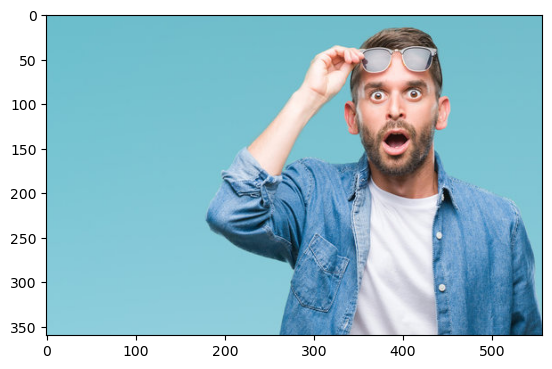

In [35]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [36]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [37]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [38]:
gray.shape

(360, 557)

In [39]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in faces:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

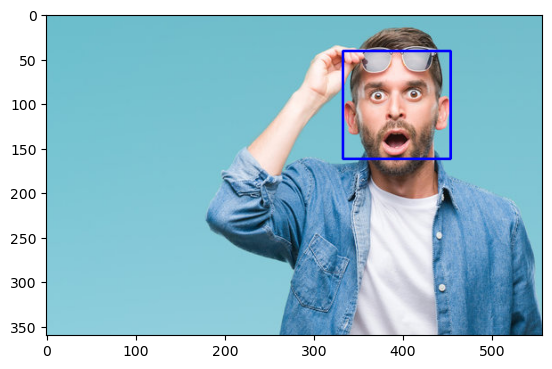

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [41]:
print(type(faces))

<class 'numpy.ndarray'>


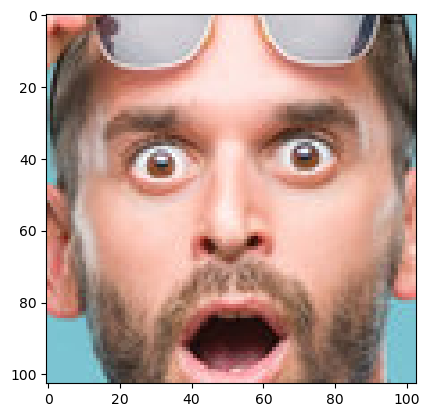

In [42]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [43]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [44]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 895ms/step


In [45]:
Predictions[0]

array([2.3307433e-07, 3.5451117e-10, 9.9999368e-01, 1.7527768e-06,
       3.0587219e-12, 1.1666955e-09, 4.2480942e-06], dtype=float32)

In [46]:
np.argmax(Predictions)

2

RealTime Video Demo

In [ ]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Some text in the box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            print("Face not detected")
        else:
            for(ex, ey, ew, eh) in faces:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]

    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions)==0):
        status = "Angry"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
    
    elif (np.argmax(Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==4):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==5):
        status = "Surprise"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    else:
        status = "Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    cv2.imshow("Face Emotion Recognition", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [===============